# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import GA.MutantAlgo as mutalg

# Поиск оптимального расписания

In [2]:
s = mutalg.solve(250)

Epoch 103 of 250. MAE = 0.23626373626373626,
corrupted!
Epoch 106 of 250. MAE = 0.23076923076923078,
corrupted!
Epoch 113 of 250. MAE = 0.21428571428571427,
corrupted!
Epoch 115 of 250. MAE = 0.21428571428571427,
corrupted!
Epoch 155 of 250. MAE = 0.16483516483516483,
Solution is found!


___
Посмотрим, сколько раз операторы выходят запасными

In [37]:
print('Лишние выходы:', np.sum(s[0].coverage - 8))

Лишние выходы: 58


# Функция для отрисовки расписания по месяцам:

In [40]:
def plot_schedule(sch):
    monthes = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
    days =    [ 31,    28,    31,    30,    31,    30,    31,    31,    30,    31,    30,    31]
    monthes_dict = dict(zip(monthes, days))
    start = 0
    for m, d in monthes_dict.items():
        my_colors = ((1., 1., 0.5, 1.0), (0.0, 0.8, 0.5, 1.0))
        cmap = LinearSegmentedColormap.from_list('my_cmap', my_colors, len(my_colors))
        
        plt.figure(figsize=(20, 7))
        plt.rcParams.update({'font.size': 18})
        
        ax = sns.heatmap(sch.S[:, start:start + d], linewidths=0.5, linecolor='green', cmap = cmap)
        
        plt.xticks(np.arange(1, d+1),np.arange(1, d+1), ha='right')
        plt.yticks(rotation='0')
        plt.xlabel(m)
        plt.ylabel('Операторы')
        plt.title(f'Расписание на {m}')
        
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0.25, 0.75])
        colorbar.set_ticklabels(['выходной', 'рабочий'])
        
        plt.savefig(f'Plots/{m}.png')
        plt.show()
        
        
        start += d

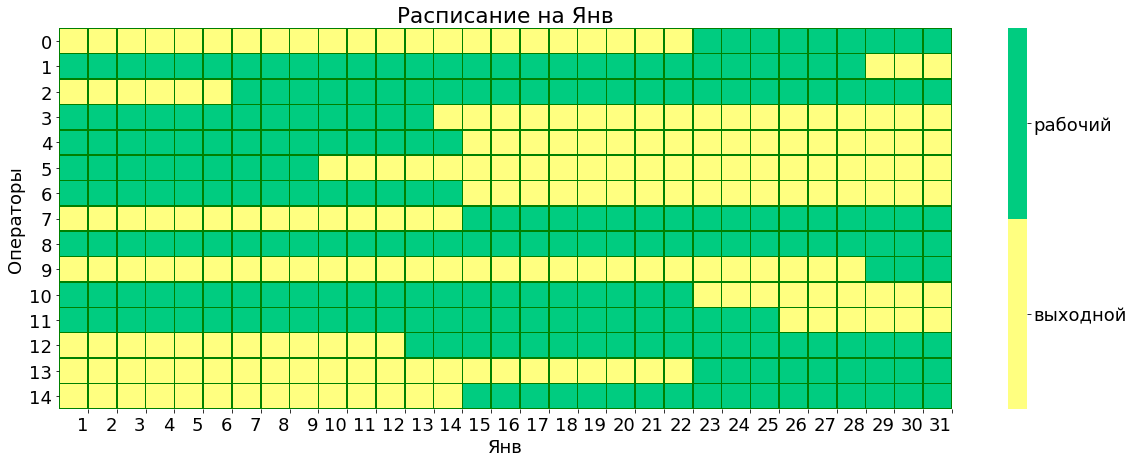

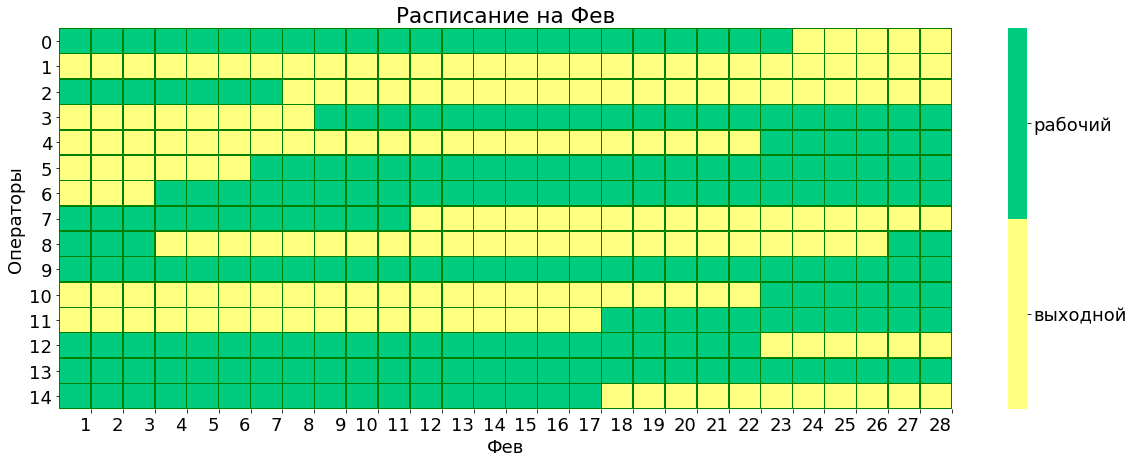

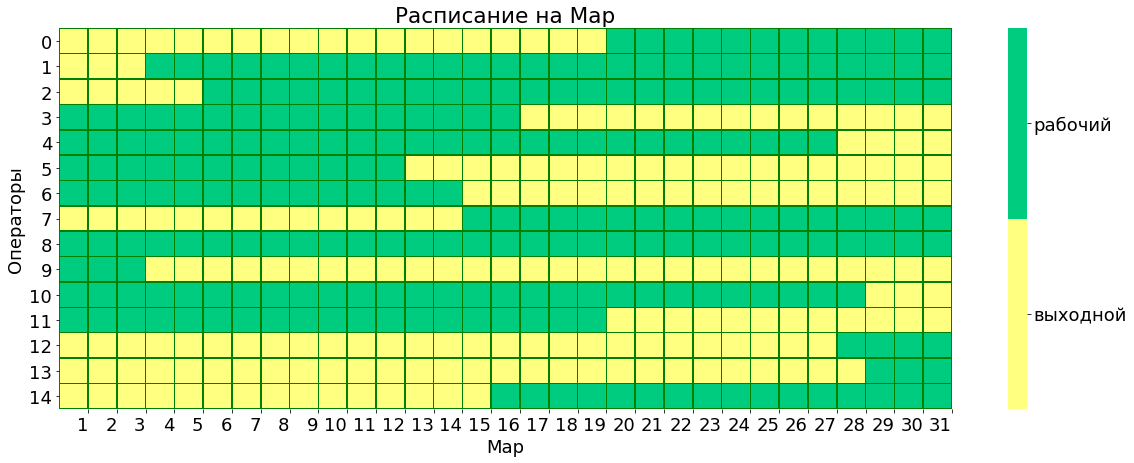

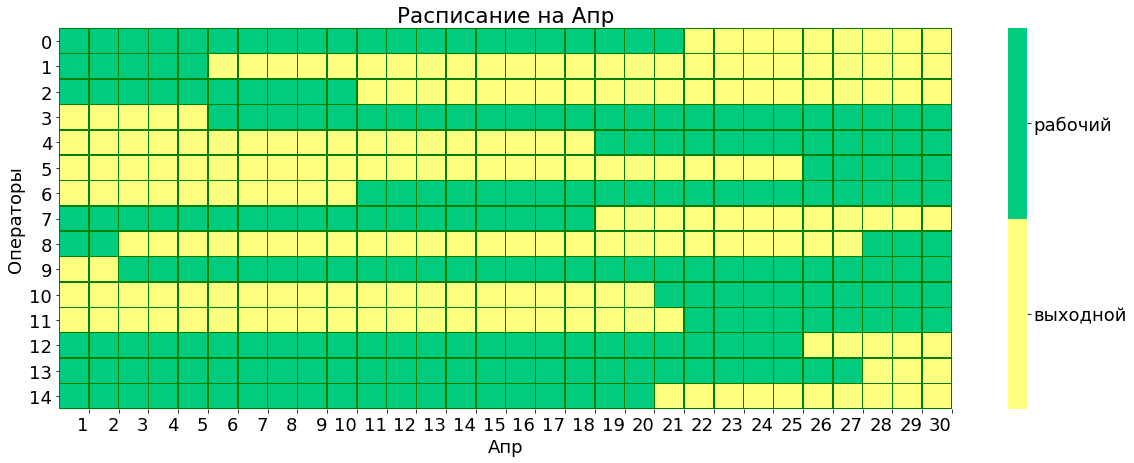

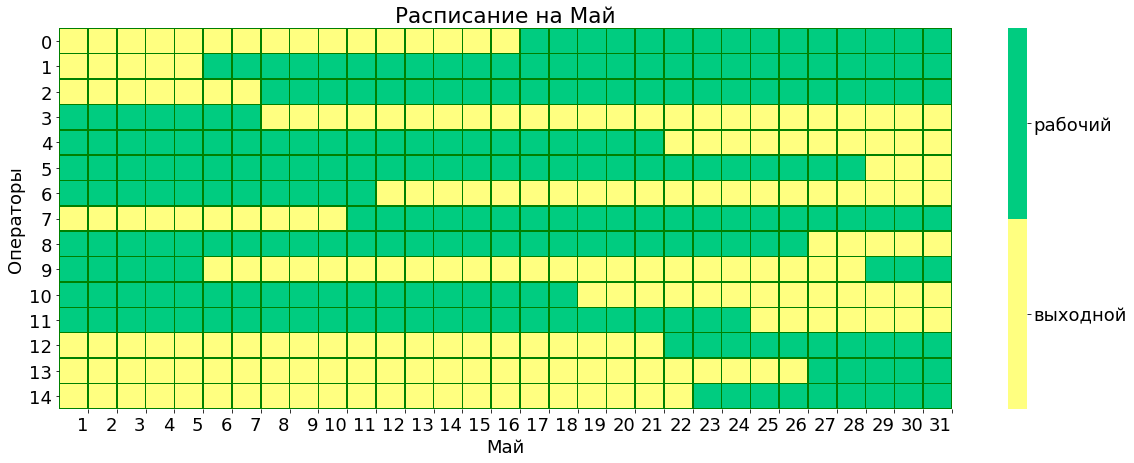

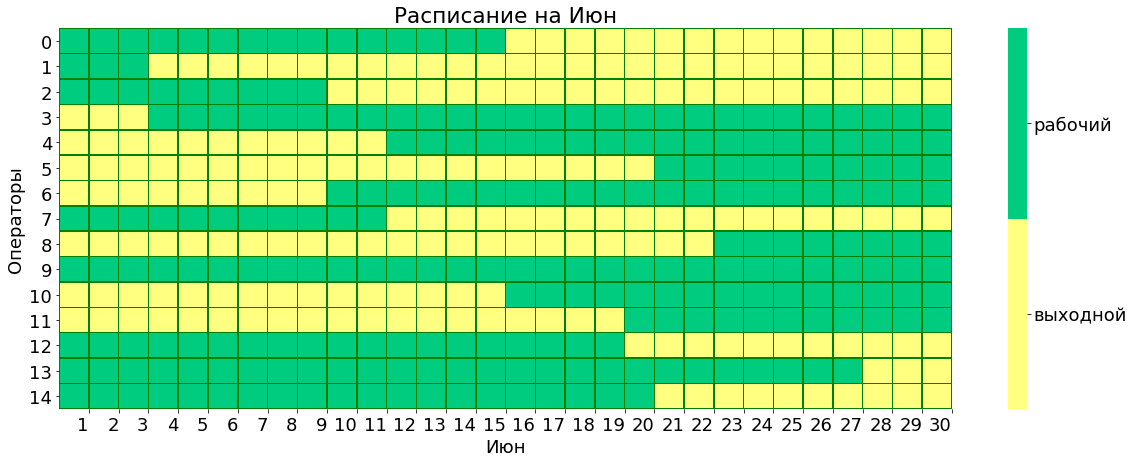

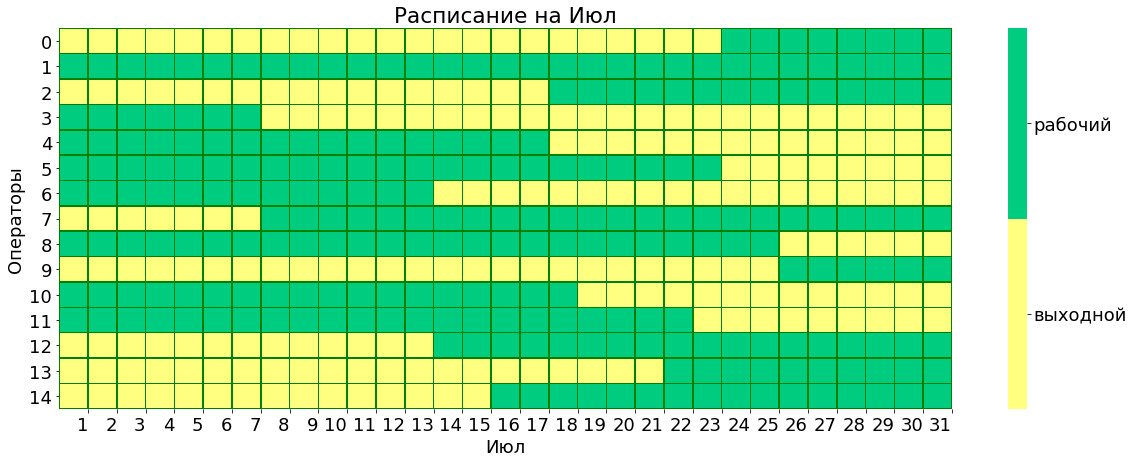

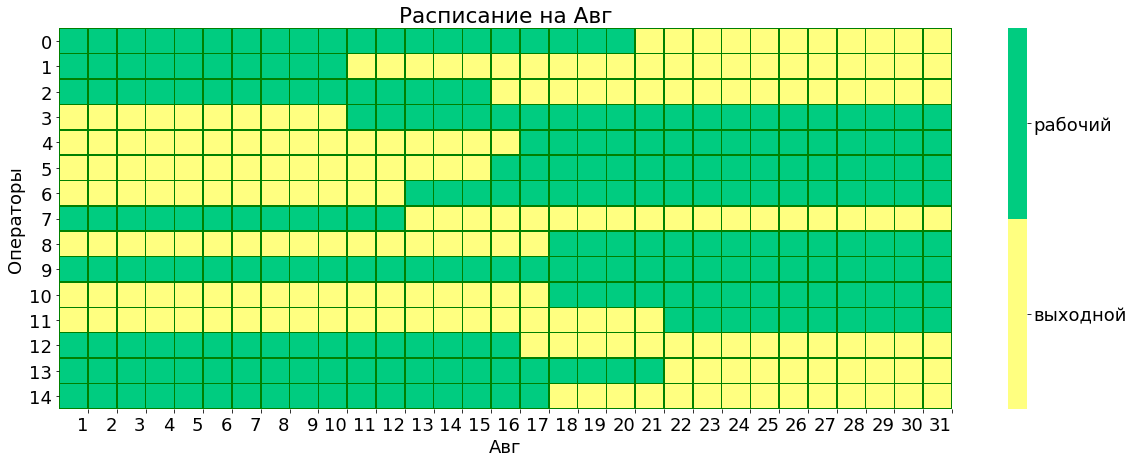

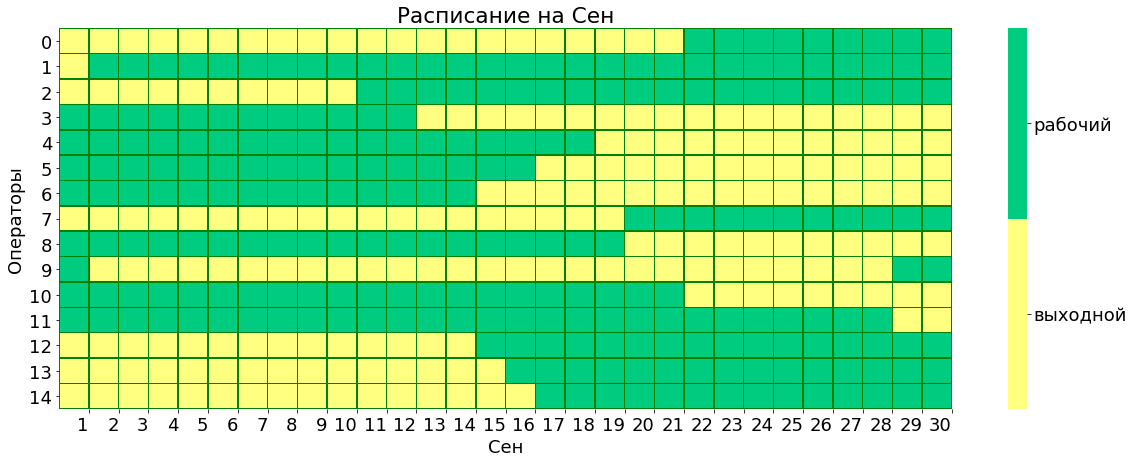

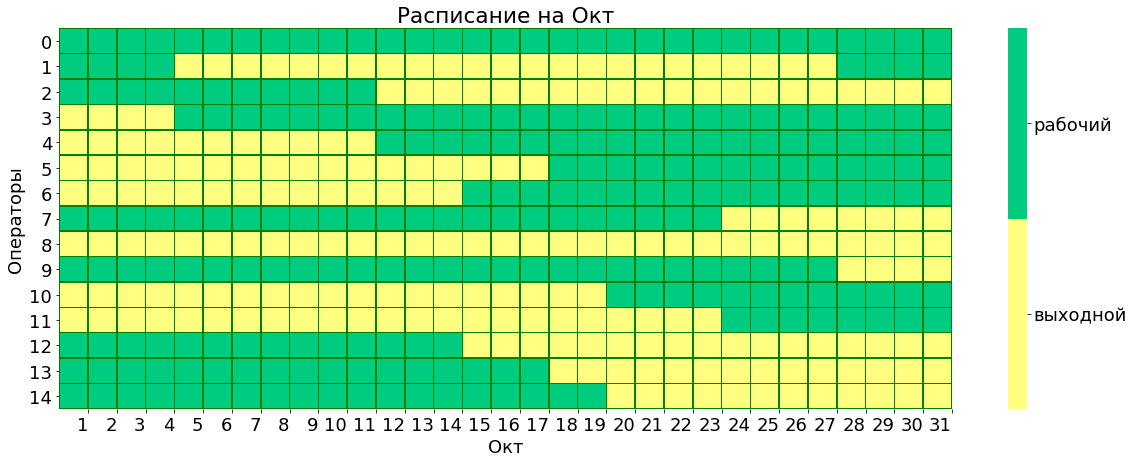

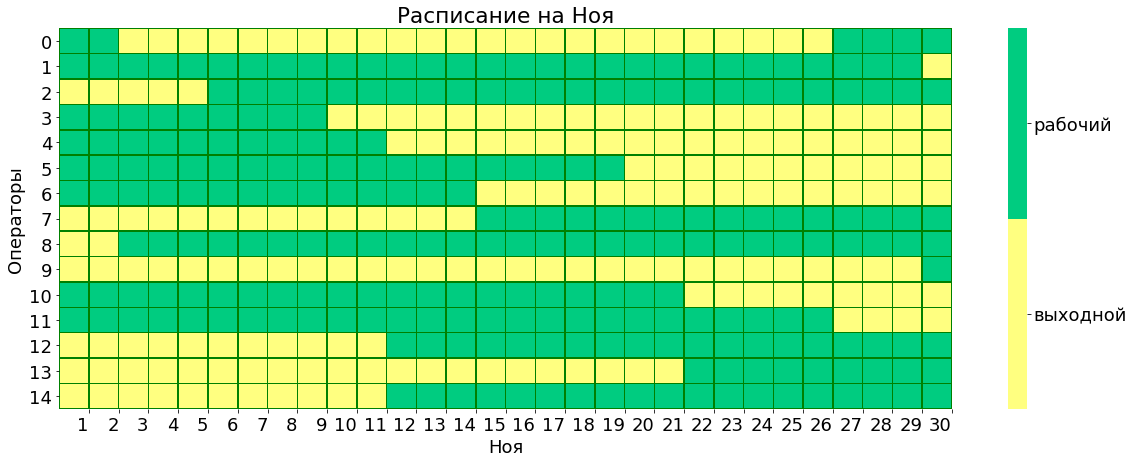

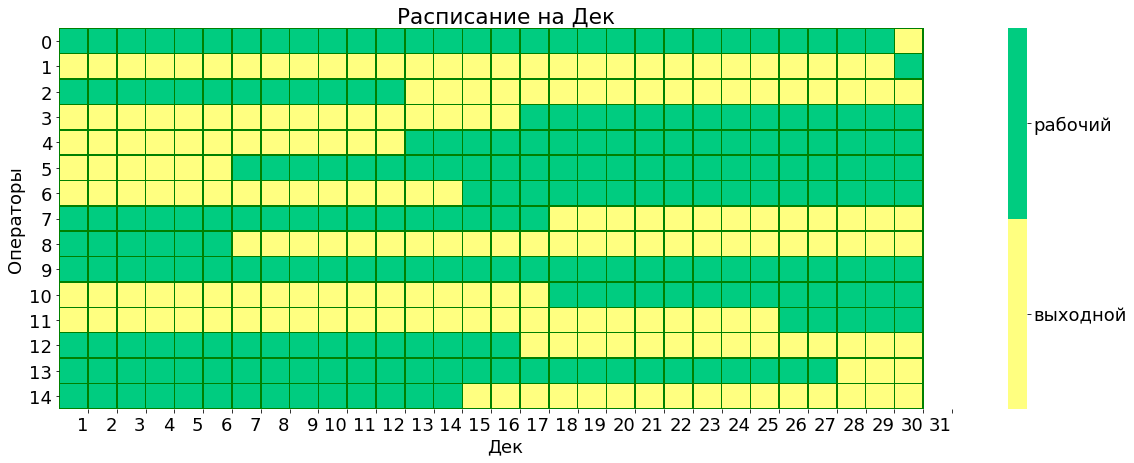

In [41]:
plot_schedule(s[0])